In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_excel('ICM_FinalProject_Part_1/ICM_FinalProject_Part_1/BIOCARD_ICM_random200.xlsx').replace("'", "", regex=True)
df.columns = df.columns.str.strip("'")
df.head()
#df.applymap(lambda x: x.replace("'", "") if (isinstance(x, str)) else x)

,Subject_ID,Gender,Age,Diagnosis,ACR_R,AGWM_R,AG_R,ALIC_R,Amyg_R,AnteriorBasalForebrain_R,...,TempSul_L,Thalamus_L,dorsalWM_ACC_L,dorsal_ACC_L,rostralWM_ACC_L,rostral_ACC_L,subcallosalWM_ACC_L,subcallosal_ACC_L,subgenualWM_ACC_L,subgenual_ACC_L
0,Subject_1,F,56.8,NORMAL,14270,3694,12859,2294,2310,338,...,1175,6638,1523,13052,4,2403,104,475,225,1700
1,Subject_2,F,53.2,NORMAL,12964,3275,12063,2367,1697,243,...,858,5100,1419,10957,108,2127,18,282,160,1410
2,Subject_3,F,81.0,NORMAL,9742,3386,10980,1586,1400,175,...,1437,4546,795,9783,39,1829,0,262,73,1482
3,Subject_4,M,69.6,NORMAL,10960,3709,12992,2301,2150,301,...,1350,5400,1829,11468,34,1866,71,338,164,1772
4,Subject_5,M,55.3,NORMAL,13137,2757,13342,2275,2166,278,...,1713,5770,1421,11365,20,2184,74,491,162,1887


In [15]:
columns_filter = [
    "Diagnosis", 
    "Amyg_L", 
    "Amyg_R", 
    "Fimbria_L", 
    "Fimbria_R", 
    "Hippo_L", 
    "Hippo_R", 
    "Mammillary_L", 
    "Mammillary_R"
]
BIOCARD = pd.DataFrame(df, columns=columns_filter)
BIOCARD

,Diagnosis,Amyg_L,Amyg_R,Fimbria_L,Fimbria_R,Hippo_L,Hippo_R,Mammillary_L,Mammillary_R
0,NORMAL,1934,2310,11,8,4003,3980,87,92
1,NORMAL,1590,1697,2,30,3358,3418,88,74
2,NORMAL,1213,1400,0,4,3038,3149,95,94
3,NORMAL,1772,2150,0,13,3302,3521,109,76
4,NORMAL,1802,2166,15,36,3560,3590,134,97
...,...,...,...,...,...,...,...,...,...
195,NORMAL,1714,1859,9,34,3783,3767,73,81
196,NORMAL,2120,2120,20,22,4374,3975,83,64
197,NORMAL,1586,2229,4,27,3709,3931,81,85
198,NORMAL,1841,2228,4,2,3782,3632,111,111


In [17]:
#filter non normal values
NORMAL = BIOCARD.loc[BIOCARD["Diagnosis"] == BIOCARD["Diagnosis"][0]]
mu = NORMAL.mean()
sigma = NORMAL.std(ddof=0)

/tmp/ipykernel_849973/2086537213.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mu = NORMAL.mean()
/tmp/ipykernel_849973/2086537213.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sigma = NORMAL.std(ddof=0)


In [34]:
zscores = (BIOCARD - mu) / sigma
zscores = zscores.loc[:, zscores.columns != "Diagnosis"]
zscores = zscores.join(BIOCARD["Diagnosis"])
zscores

,Amyg_L,Amyg_R,Fimbria_L,Fimbria_R,Hippo_L,Hippo_R,Mammillary_L,Mammillary_R,Diagnosis
0,1.335444,1.648567,0.129265,-1.194473,1.300113,1.207389,-0.256069,0.860736,NORMAL
1,-0.379938,-0.852183,-1.014730,1.020421,-0.508081,-0.467676,-0.197961,-0.359151,NORMAL
2,-2.259877,-2.063803,-1.268951,-1.597181,-1.405169,-1.269442,0.208794,0.996279,NORMAL
3,0.527619,0.995843,-1.268951,-0.691088,-0.665071,-0.160680,1.022305,-0.223608,NORMAL
4,0.677216,1.061115,0.637707,1.624483,0.058206,0.044978,2.475003,1.199593,NORMAL
...,...,...,...,...,...,...,...,...,...
195,0.238398,-0.191300,-0.124956,1.423129,0.683365,0.572534,-1.069579,0.115250,NORMAL
196,2.262947,0.873457,1.273259,0.215005,2.340174,1.192486,-0.488500,-1.036865,NORMAL
197,-0.399884,1.318125,-0.760509,0.718390,0.475913,1.061342,-0.604716,0.386336,NORMAL
198,0.871693,1.314046,-0.760509,-1.798535,0.680561,0.170160,1.138521,2.148394,NORMAL


In [20]:
partitioned_zscores = zscores.sort_values(by=["Diagnosis"], ascending=False)
NORMAL_COUNT = sum(partitioned_zscores["Diagnosis"] == "NORMAL")
print(NORMAL_COUNT)

177


<AxesSubplot:ylabel='Diagnosis'>

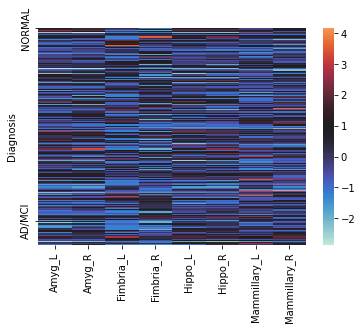

In [181]:
sns.heatmap(partitioned_zscores.set_index("Diagnosis"), center=1, yticklabels=177)

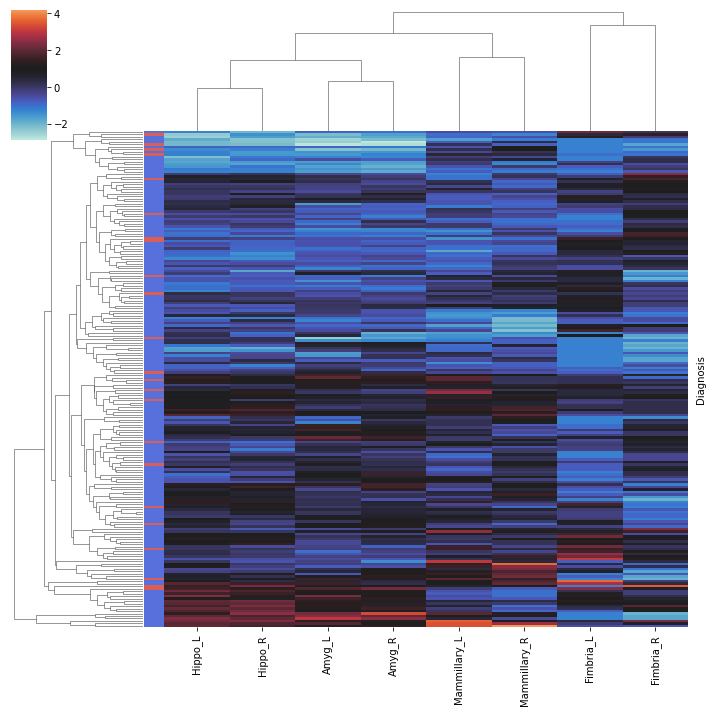

In [74]:
lut = dict(zip(
    ["NORMAL", "AD/MCI"], 
    [sns.color_palette("hls", 8)[5], sns.color_palette("hls", 8)[0]],
))
row_colors = tuple(lut[i] for i in zscores["Diagnosis"])
cluster = sns.clustermap(
    partitioned_zscores.set_index("Diagnosis"), 
    center=1, 
    row_colors=row_colors, 
    yticklabels=False,
)

In [222]:
FILEPATH = "output/MNI_286Labels_corrected_stats.txt"
MNI_stats = pd.read_csv(FILEPATH, sep="\t", skiprows=9, header=None).drop(columns=7)
MNI_stats.columns = ['Image', 'Object', 'Volume_mm3', 'Min', 'Max', 'Mean', 'Std']

MNI_BIOCARD_stats = MNI_stats[MNI_stats["Object"].isin(BIOCARD.columns)].drop_duplicates(subset="Object").sort_values(by=["Object"])
MNI_BIOCARD_stats

,Image,Object,Volume_mm3,Min,Max,Mean,Std
129,MNI.img,Amyg_L,2001.0,116.0,334.0,196.1409,27.2998
130,MNI.img,Amyg_R,2130.0,130.0,369.0,203.7432,33.9113
493,MNI.img,Fimbria_L,47.0,154.0,375.0,296.4255,43.5542
495,MNI.img,Fimbria_R,30.0,198.0,361.0,284.9667,42.1770
131,MNI.img,Hippo_L,4836.0,56.0,376.0,196.6933,43.8331
132,MNI.img,Hippo_R,5056.0,72.0,399.0,212.3248,48.4976
386,MNI.img,Mammillary_L,174.0,148.0,392.0,273.2816,46.0916
385,MNI.img,Mammillary_R,145.0,105.0,344.0,248.5241,47.0344


In [223]:
volumes = tuple(MNI_BIOCARD_stats["Volume_mm3"])
dictmu = dict(mu)
dictsigma = dict(sigma)

filtered = MNI_BIOCARD_stats[["Object", "Volume_mm3"]]
MNI_BIOCARD_zscore = []
for i, j in filtered.itertuples(index=False):
    MNI_BIOCARD_zscore.append((j - dictmu[i]) / dictsigma[i])

MNI_BIOCARD_zscore

[1.6695449635196022,
 0.9142521563595706,
 4.705243165112117,
 1.0204213576469772,
 3.6353456813392073,
 4.41445254788726,
 4.799318539149136,
 4.452624315545629]

In [217]:
print(mu)
print(sigma)

Amyg_L          1666.192090
Amyg_R          1905.892655
Fimbria_L          9.983051
Fimbria_R         19.864407
Hippo_L         3539.237288
Hippo_R         3574.909605
Mammillary_L      91.406780
Mammillary_R      79.299435
dtype: float64
Amyg_L          200.538420
Amyg_R          245.126405
Fimbria_L         7.867170
Fimbria_R         9.932753
Hippo_L         356.709602
Hippo_R         335.509416
Mammillary_L     17.209364
Mammillary_R     14.755470
dtype: float64


<AxesSubplot:>

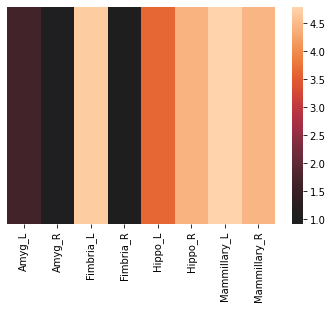

In [228]:
from numpy import array
MNI_BIOCARD_zscore = array(MNI_BIOCARD_zscore).reshape(8, 1)
sns.heatmap(MNI_BIOCARD_zscore.T, cmap="icefire", center=1, yticklabels=False, xticklabels=MNI_BIOCARD_stats["Object"])

In [225]:
DISEASED = BIOCARD.loc[BIOCARD["Diagnosis"] == "AD/MCI"]
diseasemu = DISEASED.mean()
diseasesigma = DISEASED.std(ddof=0)

/tmp/ipykernel_849973/2471771235.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  diseasemu = DISEASED.mean()
/tmp/ipykernel_849973/2471771235.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  diseasesigma = DISEASED.std(ddof=0)


<AxesSubplot:>

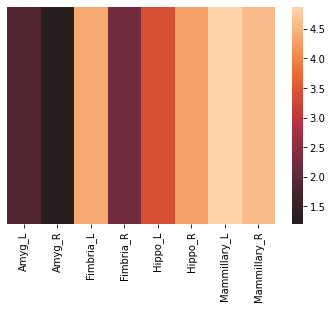

In [227]:
dict_disease_mu = dict(diseasemu)
dict_disease_sigma = dict(diseasesigma)

filtered = MNI_BIOCARD_stats[["Object", "Volume_mm3"]]
disease_zscore = []
for i, j in filtered.itertuples(index=False):
    disease_zscore.append((j - dict_disease_mu[i]) / dict_disease_sigma[i])

disease_zscore = array(disease_zscore).reshape(8, 1)
sns.heatmap(disease_zscore.T, cmap="icefire", center=1, xticklabels=MNI_BIOCARD_stats["Object"], yticklabels=False)